<a href="https://colab.research.google.com/github/Abdulwaliy/Neuromatch_Codes/blob/main/Four_Region_of_Interest_with_Try_Except_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [ ]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
# @title File retrieval
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)
print(data.trace_timestamps)


85         [-1.228133913303992, -1.1958145997959921, -1.1...
86         [-1.228133913303992, -1.1958145997959921, -1.1...
87         [-1.228133913303992, -1.1958145997959921, -1.1...
88         [-1.228133913303992, -1.1958145997959921, -1.1...
89         [-1.228133913303992, -1.1958145997959921, -1.1...
                                 ...                        
1709437    [-1.2279264819932727, -1.1956126272039762, -1....
1709438    [-1.2279264819932727, -1.1956126272039762, -1....
1709439    [-1.2279264819932727, -1.1956126272039762, -1....
1709440    [-1.2279264819932727, -1.1956126272039762, -1....
1709441    [-1.2279264819932727, -1.1956126272039762, -1....
Name: trace_timestamps, Length: 147695, dtype: object


In [ ]:
# @title SST_Data Retrieval
sst_data = data[(data.cre_line == 'Sst-IRES-Cre') & (data.is_change == True)]
#print(sst_data)
print(data.trace_timestamps)

85         [-1.228133913303992, -1.1958145997959921, -1.1...
86         [-1.228133913303992, -1.1958145997959921, -1.1...
87         [-1.228133913303992, -1.1958145997959921, -1.1...
88         [-1.228133913303992, -1.1958145997959921, -1.1...
89         [-1.228133913303992, -1.1958145997959921, -1.1...
                                 ...                        
1709437    [-1.2279264819932727, -1.1956126272039762, -1....
1709438    [-1.2279264819932727, -1.1956126272039762, -1....
1709439    [-1.2279264819932727, -1.1956126272039762, -1....
1709440    [-1.2279264819932727, -1.1956126272039762, -1....
1709441    [-1.2279264819932727, -1.1956126272039762, -1....
Name: trace_timestamps, Length: 147695, dtype: object


In [ ]:
'''def separate_data_char(neuron_sst, exposure_level, rewarded):
    selected_data = pd.DataFrame()  # creating an empty pandas DataFrame

#using the function iterrows to create our specification for reward & exposure type
    for _, row in neuron_sst.iterrows():
        if row.exposure_level == exposure_level and row.rewarded == rewarded:
            selected_data = selected_data.append(row, ignore_index=True)
    return selected_data'''


'def separate_data_char(neuron_sst, exposure_level, rewarded):\n    selected_data = pd.DataFrame()  # creating an empty pandas DataFrame\n\n#using the function iterrows to create our specification for reward & exposure type\n    for _, row in neuron_sst.iterrows():\n        if row.exposure_level == exposure_level and row.rewarded == rewarded:\n            selected_data = selected_data.append(row, ignore_index=True)\n    return selected_data'

In [ ]:
'''neuron_sst = sst_data[sst_data.cell_specimen_id == cell_id]
rew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == True)]
data_trace = pd.DataFrame(rew_fam.trace)
print(data_trace)'''

"neuron_sst = sst_data[sst_data.cell_specimen_id == cell_id]\nrew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == True)]\ndata_trace = pd.DataFrame(rew_fam.trace)\nprint(data_trace)"

In [ ]:
# @title Get SST_Neurons that have valid plots
cell_id_unique_array=sst_data.cell_specimen_id.unique()
specific_id_array=[]
for element in cell_id_unique_array :
    neuron_sst=sst_data[(sst_data.cell_specimen_id==element)]

    rew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == True)] # Logical indexing
    unrew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == False)]
    rew_nov = neuron_sst[(neuron_sst.exposure_level == 'novel') & (neuron_sst.rewarded == True)]
    unrew_nov = neuron_sst[(neuron_sst.exposure_level == 'novel') & (neuron_sst.rewarded == False)]
    #print(type(unrew_fam))
    #print("the cell id is " ,cell_id)

    #check if there's element in the timestamps and traces
    elements_in_rew_fam = rew_fam.trace_timestamps.shape
    elements_in_rew_fam = sum(elements_in_rew_fam)
    elements_in_rew_nov = rew_nov.trace_timestamps.shape
    elements_in_rew_nov = sum(elements_in_rew_nov)
    elements_in_unrew_fam = unrew_fam.trace_timestamps.shape
    elements_in_unrew_fam = sum(elements_in_unrew_fam)
    elements_in_unrew_nov = unrew_nov.trace_timestamps.shape
    elements_in_unrew_nov = sum(elements_in_unrew_nov)

    if elements_in_rew_fam > 0 and elements_in_rew_nov > 0 or elements_in_unrew_fam > 0 or elements_in_unrew_nov > 0:
      specific_id_array.append(element)



  # Define a list of tuples with the parameters for each function call
    #conditions = [('familiar', True), ('familiar', False), ('novel', True), ('novel', False)]

# Use a loop to call the function and store the results in a list of DataFrames
    #results = [separate_data_char(neuron_sst, exposure, rewarded) for exposure, rewarded in conditions]

# Unpack the trials of this specific neuron into the four categories
'''    rew_fam, unrew_fam, rew_nov, unrew_nov = results
    i=0
    for category in [rew_fam, unrew_fam, rew_nov, unrew_nov]:
      if category.shape[0] <= 1:
        i=i+1
        if i>=2:
          specific_id_array.append(element)
          break
        else:
          continue
      else:
        continue'''

print(specific_id_array)
print(len(specific_id_array))

[1086496689, 1086501573, 1086500533, 1086497438, 1086497908, 1086501720, 1086497129, 1086497034, 1086496500, 1086498071, 1086498820, 1086499316, 1086499479, 1086500121, 1086499798, 1086498977, 1086500281, 1086497277, 1086497550, 1086498646, 1086496368, 1086498569, 1086500926, 1086491397, 1086490920, 1086491079, 1086491035, 1086491129, 1086491172, 1086491215, 1086491328, 1086490784, 1086491256, 1086491469, 1086490995, 1086490598, 1086490697, 1086490748, 1086490519, 1086490561, 1086490867, 1086490391, 1086490689, 1086491368, 1086490648, 1086491461, 1086490613, 1086490526, 1086490482, 1086490794, 1086490839, 1086490777, 1086491838, 1086490572, 1086491263, 1086490994, 1086491066, 1086491194, 1086490936, 1086492214, 1086500633, 1086500392, 1086500770, 1086500872, 1086499783, 1086499911, 1086500092, 1086500297, 1086501106, 1086501010, 1086499499, 1086500194, 1086499628, 1086500583, 1086500807, 1086502471, 1086501262, 1086501360, 1086501850, 1086501072, 1086502044, 1086502269, 1086502594, 108

In [ ]:
# @title Get valid Cell_ID Data
#cell_id = 1086569757
#cell_id = 1086497129
#cell_id = 1086491215
#cell_id = 1086668278

#check validity of cell_id
cells_id  = specific_id_array
def check_Validity():

  global rew_fam, unrew_fam, rew_nov, unrew_nov, cell_id


  validity = False

  while not validity:
    cell_id = 1086497438
    #cell_id = np.random.choice(data.cell_specimen_id).astype(int)
    cell_id = np.random.choice(cells_id).astype(int)
    cell_id = np.int(cell_id)
    #print(type(cell_id))
    #print(cell_id)
    neuron_sst = sst_data[sst_data.cell_specimen_id == cell_id]

    #Initialize neurons for novel and familiar images
    rew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == True)] # Logical indexing
    unrew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == False)]
    rew_nov = neuron_sst[(neuron_sst.exposure_level == 'novel') & (neuron_sst.rewarded == True)]
    unrew_nov = neuron_sst[(neuron_sst.exposure_level == 'novel') & (neuron_sst.rewarded == False)]
    #print(type(unrew_fam))
    print("the cell id is " ,cell_id)

    #check if there's element in the timestamps and traces
    elements_in_rew_fam = rew_fam.trace_timestamps.shape
    elements_in_rew_fam = sum(elements_in_rew_fam)
    elements_in_rew_nov = rew_nov.trace_timestamps.shape
    elements_in_rew_nov = sum(elements_in_rew_nov)
    elements_in_unrew_fam = unrew_fam.trace_timestamps.shape
    elements_in_unrew_fam = sum(elements_in_unrew_fam)
    elements_in_unrew_nov = unrew_nov.trace_timestamps.shape
    elements_in_unrew_nov = sum(elements_in_unrew_nov)

    #rew_fam = neuron_sst[(neuron_sst.exposure_level == 'familiar') & (neuron_sst.rewarded == True)]
    #rew_nov = neuron_sst[(neuron_sst.exposure_level == 'novel') & (neuron_sst.rewarded == True)]
    #print(neuron_sst.shape)
    #print(rew_fam.trace_timestamps.shape)
    #print(rew_nov.trace_timestamps.shape)
    #a = neuron_sst.trace_timestamps.shape
    #b = neuron_sst.trace.values.shape
    #print(a)
    #a=sum(a)
    #b = sum(b)
    #print(elements_in_rew_nov)
    #print(a)
    #if a > 0 and b > 0:

    if  elements_in_rew_fam > 0 and elements_in_rew_nov > 0 or elements_in_unrew_fam > 0 and elements_in_unrew_nov > 0:
      validity = True
      #print(validity)


  #print(rew_fam.trace.values.shape)

  #print(type(cell_id))

In [ ]:
# @title Code for fig size (not using it)
''' fig_size = 9
fig_size = plt.figure(figsize=(fig_size,fig_size))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222, sharex=ax1,sharey=ax1)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224, sharex=ax3,sharey=ax3)'''

' fig_size = 9\nfig_size = plt.figure(figsize=(fig_size,fig_size))\nax1 = plt.subplot(221)\nax2 = plt.subplot(222, sharex=ax1,sharey=ax1)\nax3 = plt.subplot(223)\nax4 = plt.subplot(224, sharex=ax3,sharey=ax3)'

In [ ]:
# @title Function for choosing cells (not using it)
def separate_data_char(neuron_sst, exposure_level, rewarded):
    selected_data = pd.DataFrame()  # creating an empty pandas DataFrame

#using the function iterrows to create our specification for reward & exposure type
    for _, row in neuron_sst.iterrows():
        if row.exposure_level == exposure_level and row.rewarded == rewarded:
            selected_data = selected_data.append(row, ignore_index=True)
    return selected_data



# Set the specific cell_id you want to analyze
#cell_id = 1086497129

#neuron_sst=sst_data[(data.cell_specimen_id==cell_id)]

# Define a list of tuples with the parameters for each function call
conditions = [('familiar', True), ('familiar', False), ('novel', True), ('novel', False)]

# Use a loop to call the function and store the results in a list of DataFrames
results = [separate_data_char(neuron_sst, exposure, rewarded) for exposure, rewarded in conditions]

# Unpack the list into separate variables
neuron1_rew_fam, neuron1_unrew_fam, neuron1_rew_nov, neuron1_unrew_nov = results
#print(neuron1_rew_fam)
print(neuron1_rew_nov)

<ipython-input-15-7c4b1c2a6acd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(row, ignore_index=True)
<ipython-input-15-7c4b1c2a6acd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(row, ignore_index=True)


Empty DataFrame
Columns: []
Index: []


In [ ]:
# @title Function for Plotting 4 Regions of Interest


#set plotting figure size and parameters


#function for plotting the region of interest
def region_of_intrest_plot(cell_id):
  fig_size = 9
  fig_size = plt.figure(figsize=(fig_size,fig_size))
  ax1 = plt.subplot(221)
  ax2 = plt.subplot(222, sharex=ax1,sharey=ax1)
  ax3 = plt.subplot(223)
  ax4 = plt.subplot(224, sharex=ax3,sharey=ax3)

  global error_bar, error_bar2, error_bar3, error_bar4
  if cell_id:
  #neuron_sst = sst_data[data.cell_specimen_id == cell_id]
  #initializing the neurons we need

#print(neuron_sst.rewarded)
# print(neuron1_unrew)
# print(sst_data.shape)
# print(neuron1_unrew.shape)
#print(neuron1_unrew_fam.rewarded)

#make use of try-except code to handle index errors
    try:
      ax1.plot(rew_fam.trace_timestamps.iloc[0],rew_fam.trace.values.mean())
      ax2.plot(rew_nov.trace_timestamps.iloc[0],rew_nov.trace.values.mean())
      ax3.plot(unrew_fam.trace_timestamps.iloc[0],unrew_fam.trace.values.mean())
      ax4.plot(unrew_nov.trace_timestamps.iloc[0],unrew_nov.trace.values.mean())

      #compute SEM
      y_error_rew_fam=rew_fam.trace.values.std()
      y_error_unrew_fam=unrew_fam.trace.values.std()
      y_error_rew_fam /=np.sqrt(rew_fam.shape[0])
      y_error_unrew_fam /=np.sqrt(unrew_fam.shape[0])

      y_error_rew_nov=rew_nov.trace.values.std()
      y_error_unrew_nov=unrew_nov.trace.values.std()
      y_error_rew_nov /=np.sqrt(rew_nov.shape[0])
      y_error_unrew_nov /=np.sqrt(unrew_nov.shape[0])

      #compute error_bar plot

      error_bar = ax1.fill_between(rew_fam.trace_timestamps.iloc[0], rew_fam.trace.values.mean()-y_error_rew_fam, rew_fam.trace.values.mean()+y_error_rew_fam, alpha=0.2)
      error_bar2 = ax2.fill_between(rew_nov.trace_timestamps.iloc[0], rew_nov.trace.values.mean()-y_error_rew_nov, rew_nov.trace.values.mean()+y_error_rew_nov, alpha=0.2)
      error_bar4 = ax4.fill_between(unrew_nov.trace_timestamps.iloc[0], unrew_nov.trace.values.mean()-y_error_unrew_nov, unrew_nov.trace.values.mean()+y_error_unrew_nov, alpha=0.2)
      error_bar3 = ax3.fill_between(unrew_fam.trace_timestamps.iloc[0], unrew_fam.trace.values.mean()-y_error_unrew_fam, unrew_fam.trace.values.mean()+y_error_unrew_fam, alpha=0.2)
      ax1.set_title(" rewarded familiar images")
      ax2.set_title(" rewarded novel images")
      ax3.set_title(" unrewarded familiar images")
      ax4.set_title(" unrewarded novel images")

    except IndexError:
      print("Index should be smaller to be able to plot the region of interest.")

    #return error_bar, error_bar2, error_bar3, error_bar4
#call function





the cell id is  1086490920
the cell id is  1086491397
the cell id is  1086491838


<ipython-input-9-ec806b964eb3>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cell_id = np.int(cell_id)


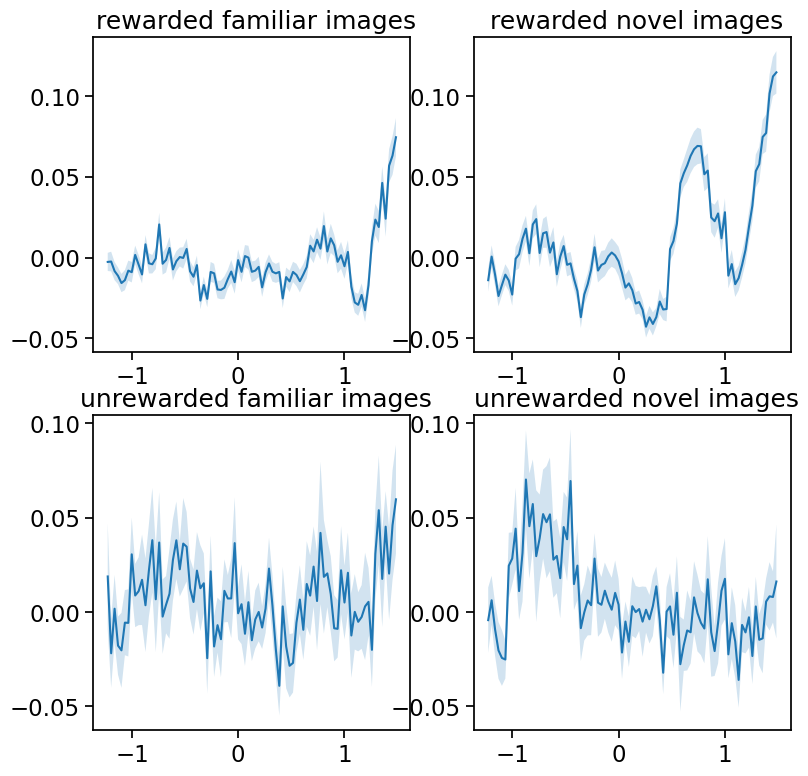

In [ ]:
check_Validity()
region_of_intrest_plot(cell_id)

In [ ]:
# A code that collects in a list the cell_specimen_ids that have trials in at least two categories
cell_id_unique_array=sst_data.cell_specimen_id.unique()
specific_id_array=[]
for element in cell_id_unique_array :
    neuron_sst=sst_data[(sst_data.cell_specimen_id==element)]
  # Define a list of tuples with the parameters for each function call
    conditions = [('familiar', True), ('familiar', False), ('novel', True), ('novel', False)]

# Use a loop to call the function and store the results in a list of DataFrames
    results = [separate_data_char(neuron_sst, exposure, rewarded) for exposure, rewarded in conditions]

# Unpack the trials of this specific neuron into the four categories
    rew_fam, unrew_fam, rew_nov, unrew_nov = results
    i=0
    j=0
    for category in [rew_fam, unrew_fam, rew_nov, unrew_nov]:
      if category.shape[0] <= 1: #has zero or one trial
        i=i+1                    #counter to count no of categories that satisfy if condition
        if i>2:                  # if you have 3 or 4 categories that has only one or no trials
         break                   #break the loop to check a new id
        else:
          continue                #skip to check another catgory
      else:
        j=j+1                    #counter to count no of categories that don't satisfy if condition (has more than one trial)
        if j>=2:
          specific_id_array.append(element)
          break                    #break after appending this id to check new ids

print(specific_id_array)
print(len(specific_id_array))

NameError: ignored

In [ ]:
data_trace = pd.DataFrame(rew_fam.trace)
time_trace =pd.DataFrame(rew_fam.trace_timestamps)
print (time_trace)
print(data_trace)

                                         trace_timestamps
730351  [-1.2281362613749274, -1.1958168860755871, -1....
730765  [-1.2281362613749274, -1.1958168860755871, -1....
731125  [-1.2281362613749274, -1.1958168860755871, -1....
731305  [-1.2281362613749274, -1.1958168860755871, -1....
731665  [-1.2281362613749274, -1.1958168860755871, -1....
...                                                   ...
814843  [-1.2281362613749274, -1.1958168860755871, -1....
815617  [-1.2281362613749274, -1.1958168860755871, -1....
815977  [-1.2281362613749274, -1.1958168860755871, -1....
816157  [-1.2281362613749274, -1.1958168860755871, -1....
816409  [-1.2281362613749274, -1.1958168860755871, -1....

[138 rows x 1 columns]
                                                    trace
730351  [-0.10574287921190262, -0.002248570555821061, ...
730765  [-0.038108374923467636, -0.01868489757180214, ...
731125  [0.03604397550225258, 0.03536025807261467, -0....
731305  [0.023239286616444588, 0.067696601152420

In [ ]:
'''t_test_rew = pd.DataFrame({'time_trace': [rew_fam.trace_timestamps], 'data_trace': [rew_fam.trace] } )
f = t_test_rew.iloc[0]
t_test_rew.iloc
t_test_rew.index[t_test_rew["time_trace"]=='0'].tolist()

#time_trace =pd.DataFrame(rew_fam.trace_timestamps)
#print (time_trace)
#print(data_trace)
print(f)'''

't_test_rew = pd.DataFrame({\'time_trace\': [rew_fam.trace_timestamps], \'data_trace\': [rew_fam.trace] } )\nf = t_test_rew.iloc[0]\nt_test_rew.iloc\nt_test_rew.index[t_test_rew["time_trace"]==\'0\'].tolist()\n \n#time_trace =pd.DataFrame(rew_fam.trace_timestamps)\n#print (time_trace)\n#print(data_trace)\nprint(f)'

In [ ]:
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
                   'points': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12],
                   'blocks': [4, 7, 7, 6, 5, 8, 9, 10]})

print(df[df["points"]=='5'])
print(df)
print(type(df.team))
df.iloc[0:2, 0:2]

Empty DataFrame
Columns: [team, points, rebounds, blocks]
Index: []
  team  points  rebounds  blocks
0    A       5        11       4
1    A       7         8       7
2    B       7        10       7
3    B       9         6       6
4    B      12         6       5
5    C       9         5       8
6    C       9         9       9
7    C       4        12      10
<class 'pandas.core.series.Series'>


,team,points
0,A,5
1,A,7


In [ ]:
'''from scipy import stats
rvs1 = stats.ttest_rel(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print (rvs1)
#print (stats.ttest_ind(rvs1))'''

'from scipy import stats\nrvs1 = stats.ttest_rel(loc = 5,scale = 10,size = 500)\nrvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)\nprint (rvs1)\n#print (stats.ttest_ind(rvs1))'